A summary of the Retweet, Reply, only descriptive statistics, using the function written for Task 1.2 in the first of the two labs).

Task 1.2: produce a descriptive summary of the two networks, choosing the whole-network measures that you find useful to report, but including at least: order, size, number of components, density, clustering coefficient / transitivity, and a plot of the degree distribution.

TIPS:

you will have to produce such a summary multiple times, to compare different graphs. So consider writing a function taking a network as input and producing the summary.
for the plot with the degree distribution, consider using log-log axes.

Order (number of nodes): 542
Size (number of edges): 8125
Number of components: 6
Density: 0.028
Clustering coefficient / Transitivity: 0.180
Average Clustering Coefficient: 0.370


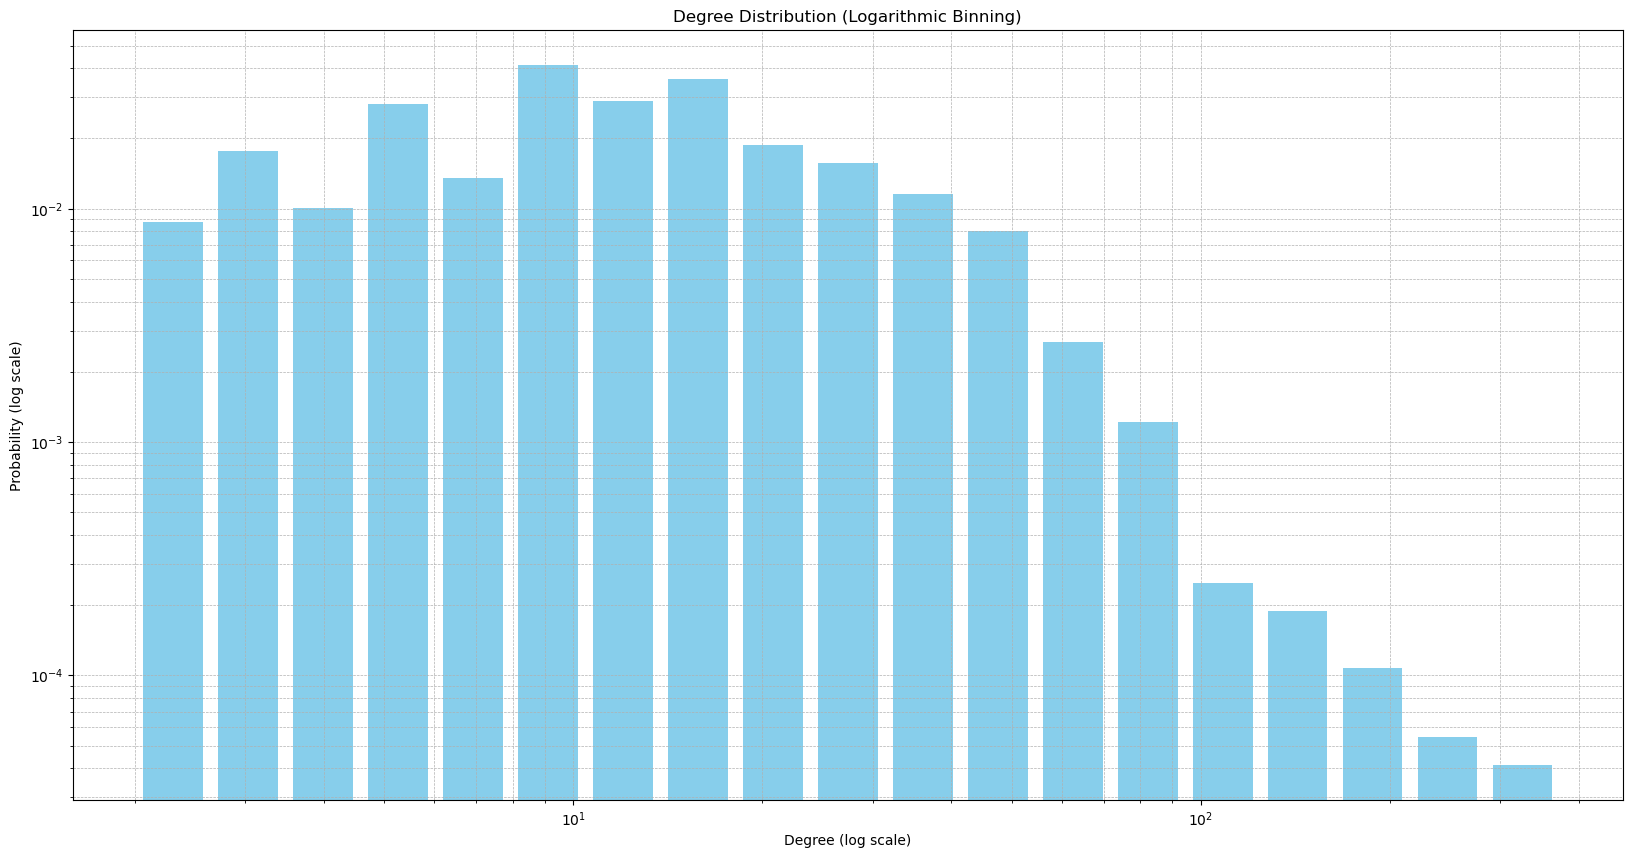

In [12]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib import cm, colors
ig.config["plotting.backend"] = "matplotlib"
g = ig.Graph.Read("filtered_social_network.pickle", format="pickle")

def graph_stats(g):
    order = g.vcount()
    size = g.ecount()
    components = len(g.connected_components())
    density = g.density()
    clustering_coefficient = g.transitivity_undirected()
    degrees = g.degree()
    
    # Compute per-node clustering coefficients
    clustering_coefficients = g.transitivity_local_undirected()
    
    # Compute betweenness centrality for all vertices
    betweenness_centrality = g.betweenness()

    print(f"Order (number of nodes): {order}")
    print(f"Size (number of edges): {size}")
    print(f"Number of components: {components}")
    print(f"Density: {density:.3f}")
    print(f"Clustering coefficient / Transitivity: {clustering_coefficient:.3f}")
    
    # Calculate and display the average clustering coefficient
    avg_clustering = np.mean([c for c in clustering_coefficients if not np.isnan(c)])
    print(f"Average Clustering Coefficient: {avg_clustering:.3f}")
    
    # Logarithmic binning for degree distribution
    min_degree = min(degrees)
    max_degree = max(degrees)
    bins = np.logspace(np.log10(min_degree if min_degree > 0 else 1), 
                       np.log10(max_degree + 1), 20, base=10)  # 30 logarithmic bins

    plt.figure(figsize=(20, 10))
    plt.title("Degree Distribution (Logarithmic Binning)")
    plt.hist(degrees, bins=bins, align='mid', rwidth=0.8, color='skyblue', density=True)
    plt.xscale('log')
    plt.yscale('log')  # Optional: log scale for y-axis if degree distribution is sparse
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Probability (log scale)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()
    
# Run the function with updated degree distribution plot
graph_stats(g)

## TODO
1. Do the same thing for ER.
2. Do the same thing for BA.
3. Do the same thing for SW.